In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import itertools
import swifter

c:\programdata\miniconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
df_lyrics = pd.read_csv("data/lyrics.csv", sep =';')

df_lyrics[:5]

,ALink,SName,SLink,Lyric,ParentGenre,Genres
0,/andre-drake/,Bae ft. V.P Rap,/andre-drake/bae-ft-v-p-rap.html,[André Drake]. Minha princesa eu troco tudo pr...,Black Music,"Black Music, Hip Hop, Rap"
1,/andre-drake/,By Chance (Brazilian Remix),/andre-drake/by-chance-brazilian-remix.html,"[Refrão]. Mais views, pode ser?. Cê sabe, que ...",Black Music,"Black Music, Hip Hop, Rap"
2,/andre-drake/,Casa do Terror,/andre-drake/casa-do-terror.html,"4 Paredes uma jaula, na minha mão uma faca. Um...",Black Music,"Black Music, Hip Hop, Rap"
3,/andre-drake/,Na Madrugada,/andre-drake/na-madrugada.html,"[Refrão 1]. Na ""madruga"" não consigo dormir. m...",Black Music,"Black Music, Hip Hop, Rap"
4,/andre-drake/,V.P Convida Parte 2,/andre-drake/v-p-convida-parte-2.html,[Vp Rap]. Vp de novo que convida. Dessa vez se...,Black Music,"Black Music, Hip Hop, Rap"


In [15]:
df_lyrics['ParentGenre'].value_counts()

Gospel/Religioso    33586
Sertanejo           23947
MPB                 13586
Romântico           13352
Forró               10734
Samba                7420
Pop/Rock             5431
Rock                 4485
Funk Carioca         4209
Pagode               4174
Rap                  3920
Pop                  3535
Infantil             2960
Velha Guarda         2782
Regional             2680
Hip Hop              2269
Reggae               2151
Bossa Nova           2115
Trilha Sonora        1683
Axé                  1217
Samba Enredo         1205
Rock Alternativo     1115
Punk Rock             946
Jovem Guarda          939
Hardcore              735
Fado                  680
Indie                 655
Soul Music            630
World Music           434
Dance                 403
                    ...  
Emocore               130
Metal                 128
Pós-Punk              119
Blues                 113
Funk                  101
Psicodelia             94
Gótico                 80
Clássico    

In [3]:
df_genres_b = df_lyrics["Genres"].value_counts()
df_genres = pd.DataFrame({"Genres":df_genres_b.index, "Count": df_genres_b}).reset_index(drop=True)
df_genres["Genres"] = df_genres["Genres"].str.split(', ')
df_genres[0:5]

,Genres,Count
0,"[Sertanejo, Romântico, Country]",3822
1,[Gospel/Religioso],3564
2,"[Romântico, Sertanejo, Country]",1895
3,[Sertanejo],1723
4,"[Sertanejo, Romântico, Forró]",1708


In [4]:
genres = {}
for i in df_genres.index:
    genres_arr = df_genres["Genres"][i]
    for genre in genres_arr:
        genres[genre] = ''
genres = np.sort(list(genres.keys()))

In [5]:
df_or = pd.DataFrame(columns=genres, index =genres).fillna(0)
df_and = pd.DataFrame(columns=genres, index =genres).fillna(0)

In [6]:
def process(linha):
 
    genres_arr = linha['Genres']
    count      = linha['Count']
    
    global df_or
    global df_and
    
    df = pd.DataFrame(columns=genres, index =genres).fillna(0)
    for genre in genres_arr:
        
        df[genre] = count
        df.loc[genre:genre] = count
        df_and[genre][genre] += count
        
    df_or = df_or.add(df)
    for subset in itertools.combinations(genres_arr, 2):
        df_and[subset[0]][subset[1]] += count
        df_and[subset[1]][subset[0]] += count
    
       
start = time.time()    
df_genres.apply(lambda linha: process(linha), axis =1)
end = time.time()

df_corr = df_and/df_or

print('\nTime(s): '+str("%.2f" % (end - start)+'s\n'))


Time(s): 37.01s



In [7]:
df_corr

,Axé,Black Music,Blues,Bossa Nova,Chillout,Classic Rock,Clássico,Country,Dance,Disco,...,Soft Rock,Soul Music,Surf Music,Tecnopop,Trance,Trilha Sonora,Trip-Hop,Tropical House,Velha Guarda,World Music
Axé,1.000000,0.013745,0.010208,0.006035,0.008810,0.000000,0.043509,0.020106,0.019749,0.035472,...,0.000000,0.000492,0.000047,0.001266,0.000000,0.010619,0.000000,0.000000,0.009994,0.000000
Black Music,0.013745,1.000000,0.020080,0.000000,0.000000,0.000000,0.000000,0.016191,0.001104,0.000000,...,0.000000,0.075411,0.000000,0.000000,0.000000,0.001633,0.002347,0.000000,0.000000,0.002525
Blues,0.010208,0.020080,1.000000,0.018397,0.000000,0.007686,0.016371,0.004439,0.000975,0.000000,...,0.000459,0.005327,0.000000,0.000000,0.000000,0.029512,0.000000,0.000000,0.024327,0.000472
Bossa Nova,0.006035,0.000000,0.018397,1.000000,0.013327,0.000000,0.018348,0.000000,0.000000,0.000000,...,0.000000,0.010739,0.000000,0.000000,0.000000,0.005345,0.000000,0.000000,0.054365,0.010747
Chillout,0.008810,0.000000,0.000000,0.013327,1.000000,0.000000,0.000000,0.000000,0.002038,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000,0.000000,0.000000
Classic Rock,0.000000,0.000000,0.007686,0.000000,0.000000,1.000000,0.000000,0.001311,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Clássico,0.043509,0.000000,0.016371,0.018348,0.000000,0.000000,1.000000,0.001350,0.005740,0.010545,...,0.000000,0.006242,0.000000,0.000000,0.000000,0.036930,0.000000,0.000000,0.025671,0.013493
Country,0.020106,0.016191,0.004439,0.000000,0.000000,0.001311,0.001350,1.000000,0.000919,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001580,0.000000,0.000000,0.001240,0.000225
Dance,0.019749,0.001104,0.000975,0.000000,0.002038,0.000000,0.005740,0.000919,1.000000,0.000158,...,0.000000,0.000000,0.000000,0.012340,0.000000,0.025190,0.000000,0.000000,0.000000,0.000000
Disco,0.035472,0.000000,0.000000,0.000000,0.000000,0.000000,0.010545,0.000000,0.000158,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019508,0.000000


In [11]:
columns = []
for i in df_corr.columns:
    for j in df_corr.columns:
        if(i!=j):
            if(df_corr[i][j]>0.3 and i not in columns):
                columns.append(i)
columns

['Hardcore',
 'Hip Hop',
 'Pagode',
 'Pop/Rock',
 'Punk Rock',
 'Rap',
 'Rock',
 'Samba']

In [12]:
df = df_corr[columns].loc[columns]

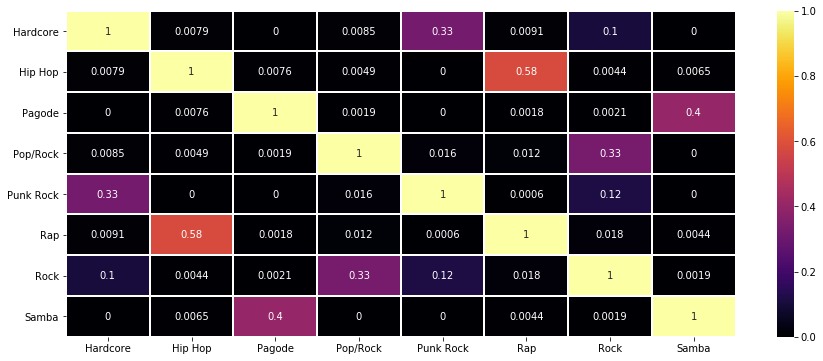

In [13]:

fig, ax = plt.subplots(figsize=(15,6))   
sns.heatmap(df.round(4), cmap = 'inferno', annot=True, linewidth = 1)
plt.show()

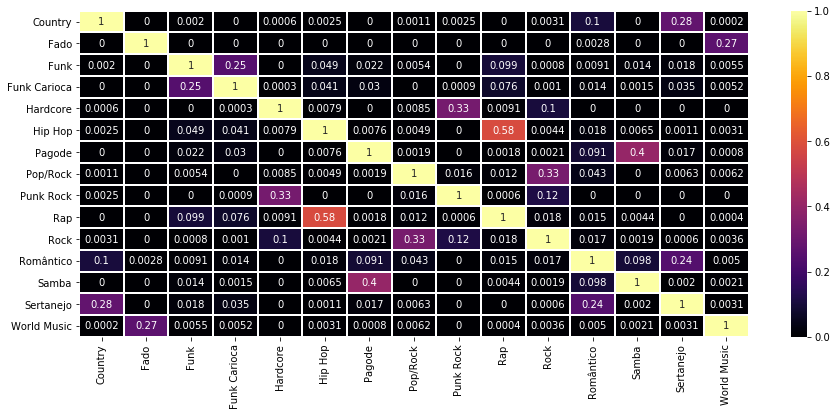

In [10]:

fig, ax = plt.subplots(figsize=(15,6))   
sns.heatmap(df.round(4), cmap = 'inferno', annot=True, linewidth = 1)
plt.show()

In [33]:
def process(genres_arr):
    size = 0
    try:
        size = len(genres_arr)
    finally:
        return size
       
    
df_lyrics["SizeGenres"] = df_lyrics["Genres"].map(process)


In [34]:
df_lyrics["SizeGenres"].value_counts()

3    190499
2     14553
1      9995
Name: SizeGenres, dtype: int64

In [35]:
df_lyrics[df_lyrics["SizeGenres"]==1]

,ALink,SName,SLink,Lyric,ParentGenre,Genres,SizeGenres
312,/laura-helena/,Agora sai,/laura-helena/agora-sai.html,Não queria ter feito o que eu fiz. pois bem. F...,Black Music,[Black Music],1
313,/laura-helena/,Essa sou eu,/laura-helena/essa-sou-eu.html,Eu sempre fui assim. quis me esconder. Com med...,Black Music,[Black Music],1
314,/laura-helena/,Fazer voce acreditar,/laura-helena/fazer-voce-acreditar.html,Agora. é a hora. não tenho nada a perder. mas ...,Black Music,[Black Music],1
315,/laura-helena/,Me Encontrar,/laura-helena/me-encontrar.html,Whoa. Oh. Ooh. . Nesta festa. Sozinha começo a...,Black Music,[Black Music],1
316,/laura-helena/,Nunca Vou Te Esquecer (Dueto),/laura-helena/nunca-vou-te-esquecer.html,Ela:parece que ele não me ajuda. Que ele não m...,Black Music,[Black Music],1
317,/laura-helena/,Pensar Alto,/laura-helena/pensar-alto.html,Olhe para essa noite. De lua cheia. Olhe para ...,Black Music,[Black Music],1
318,/laura-helena/,Se desligue do mundo,/laura-helena/se-desligue-do-mundo.html,Vai lá. respire fundo. e se desligue do mundo....,Black Music,[Black Music],1
319,/laura-helena/,Sozinha,/laura-helena/sozinha.html,Foi íncrivel. foi um sonho sim. Todas as lembr...,Black Music,[Black Music],1
322,/leandro-luther-fumaca/,Estilosa,/leandro-luther-fumaca/estilosa.html,Êta lá em casa!. Lá no meu barraco!. Ia ser um...,Black Music,[Black Music],1
1986,/andre-christovam/,Carne de Pescoço,/andre-christovam/carne-de-pescoco.html,"Em plena rua Aurora, meu carro pifou. Chegando...",Blues,[Blues],1


In [36]:
df_2 = df_lyrics[df_lyrics["SizeGenres"]==1]
df_2["ParentGenre"].value_counts()

Sertanejo           2307
Gospel/Religioso    2089
MPB                  779
Funk Carioca         652
Forró                606
Rap                  522
Pop/Rock             365
Pop                  342
Samba                302
Reggae               263
World Music          193
Infantil             180
Samba Enredo         173
Rock                 162
Bossa Nova           150
Pagode               130
Heavy Metal          111
Folk                 104
Punk Rock             95
Trilha Sonora         80
Hip Hop               75
Hardcore              53
Hard Rock             36
Fado                  35
Indie                 31
Regional              22
New Age               17
Kizomba               16
Blues                 15
Dance                 12
Romântico             11
Country               10
Electronica            9
Black Music            9
Metal                  9
J-Pop/J-Rock           8
Funk                   6
R&B                    5
Jovem Guarda           3
Instrumental           2
